## Introduction

### Number of floating point operations

In [4]:
def get_FFNN_FLOPs(shape):
    L = len(shape)
    numflop = 0
    for l in range(L-1):
        numflop+= shape[l+1]*((2*shape[l])-1)
    return numflop

In [5]:
shape0 = (784, 784, 10)
shape1 = (10, 10, 10, 10, 10, 10, 10, 10, 10, 10)
shape2 = (2, 3, 2, 2)
shape3 = (3, 4, 3, 3)    

get_FFNN_FLOPs(shape0), get_FFNN_FLOPs(shape1)

(1244198, 1710)

## Feed-forward neural networks

### Common activation functions

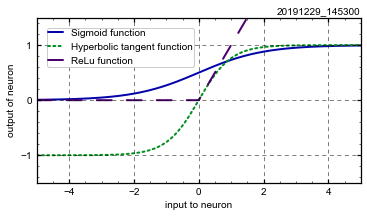

In [2]:
import numpy as np
import spyder_utilities as su
import matplotlib.pyplot as plt
x = np.linspace(-5, 5, 1000)
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax = su.config_axis(ax, x_lim=(-5, 5), y_lim=(-1.5, 1.5), Y_0=1, mult_y=1 , Eng=False)
ax.plot(x, 1/(1+np.e**(-x)), linewidth=2, label="Sigmoid function")
ax.plot(x, np.tanh(x), linestyle=':', linewidth=2, label="Hyperbolic tangent function")
ax.plot(x, np.maximum(0, x), linestyle='--', linewidth=2, label="ReLu function")
ax.set_xlabel("input to neuron")
ax.set_ylabel("output of neuron")
ax.legend()
plt.show()
# su.save_fig(fig,
#             image_nm="common_activation_functions",
#             paper_format=["pdf", "png"], debug=False)

## Neurons

### Hidden layer neuron

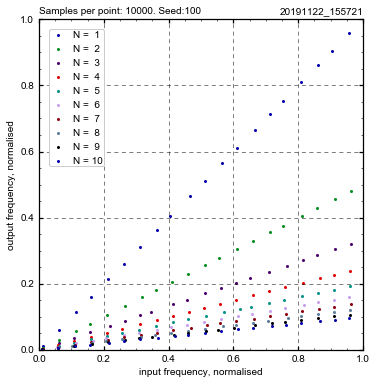

In [13]:
"""
Daniel Maidment

Thu Oct 15 2019
"""
########################################################################
import spyder_utilities as su
import numpy as np
import matplotlib.pyplot as plt
from spnetwork.neuron import Neuron
########################################################################

seed = 100
np.random.seed(seed)
size = 10000
N = 11

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax = su.config_axis(ax, x_lim=(0, 1), y_lim=(0, 1), Eng=False)
P = np.arange(0.01, 1, 0.05)

for n in np.arange(1, N, 1):
    tNeuron = Neuron(n)
    p_x = np.empty(np.shape(P), dtype=float)
    p_y = np.empty(np.shape(P), dtype=float)

    for i in range(len(P)):
        in_ar_1 = np.array(np.random.binomial(1, P[i], size),
                           dtype=bool)
        p_x[i] = np.mean(in_ar_1)

        out_ar = np.zeros(size, bool)

        for j in range(size):
            out_ar[j] = tNeuron + in_ar_1[j]

        p_y[i] = np.mean(out_ar)
        tNeuron.reset()

    label = f"N = {n:2d}"
    ax.scatter(p_x, p_y, label=label)

s = f"Samples per point: {size}. Seed:{seed}"
plt.legend()
ax.text(0, 1.01, s,
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax.transAxes)
ax.set_xlabel("input frequency, normalised")
ax.set_ylabel("output frequency, normalised")
plt.show()
su.save_fig(fig=fig, path = "\\images\\neuron",
            image_nm=f"linear_neuron_frequency_model_{N}_{size}",
            paper_format=['pdf', 'png'])

### Hidden layer neuron with feedback

#### Frequency model of the hidden layer neuron with feedback for small values of NFF where NFB=NFF-1.

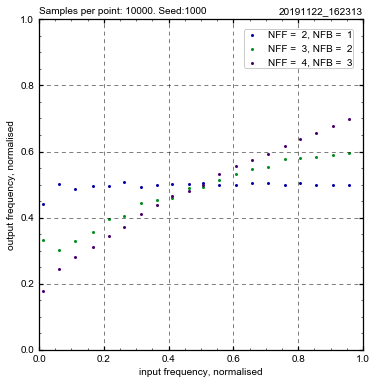

path specified as: \images\neuron\delayFB2


In [21]:
"""
Daniel Maidment

Thu Oct 24 2019
"""
########################################################################

import spyder_utilities as su
import numpy as np
import matplotlib.pyplot as plt
from spnetwork.neuron import DelayFBNeuron2

########################################################################

seed = 1000
size = 10000
N = 5

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax = su.config_axis(ax, x_lim=(0, 1), y_lim=(0, 1), Eng=False)
P = np.arange(0.01, 1, 0.05)

for n in np.arange(2, N, 1):
    tNeuron = DelayFBNeuron2(n, n-1)

    p_x = np.empty(np.shape(P), dtype=float)
    p_y = np.empty(np.shape(P), dtype=float)

    for i in range(len(P)):
        np.random.seed(seed)
        in_ar = np.array(np.random.binomial(1, P[i], size), dtype=bool)
        p_x[i] = np.mean(in_ar)

        out_ar = np.zeros(size, bool)

        for j in range(size):
            out_ar[j] = tNeuron + in_ar[j]

        p_y[i] = np.mean(out_ar)
        tNeuron.reset()

    label = f"NFF = {n:2d}, NFB = {n-1:2d}"
    ax.scatter(p_x, p_y, label=label)

s = f"Samples per point: {size}. Seed:{seed}"
ax.legend()
ax.text(0, 1.01, s,
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax.transAxes)
ax.set_xlabel("input frequency, normalised")
ax.set_ylabel("output frequency, normalised")
plt.show()

su.save_fig(fig=fig, path = "\\images\\neuron\\delayFB2",
            image_nm=f"feedback_neuron_frequency_model_smallNFF_smallNFB",
            paper_format=['pdf', 'png'], debug=True)

#### Frequency model of the hidden layer neuron with feedback where of NFF=4 and NFB is small.

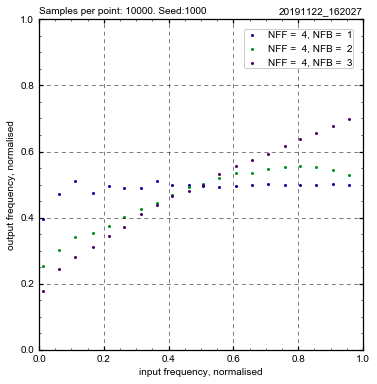

path specified as: \images\neuron\delayFB2


In [19]:
"""
Daniel Maidment

Thu Nov 11
"""
########################################################################

import spyder_utilities as su
import numpy as np
import matplotlib.pyplot as plt
from spnetwork.neuron import DelayFBNeuron2

########################################################################

seed = 1000
size = 10000
N = 4

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax = su.config_axis(ax, x_lim=(0, 1), y_lim=(0, 1), Eng=False)
P = np.arange(0.01, 1, 0.05)

for n in np.arange(1, N, 1):
    tNeuron = DelayFBNeuron2(N, n)

    p_x = np.empty(np.shape(P), dtype=float)
    p_y = np.empty(np.shape(P), dtype=float)

    for i in range(len(P)):
        np.random.seed(seed)
        in_ar = np.array(np.random.binomial(1, P[i], size), dtype=bool)
        p_x[i] = np.mean(in_ar)

        out_ar = np.zeros(size, bool)

        for j in range(size):
            out_ar[j] = tNeuron + in_ar[j]

        p_y[i] = np.mean(out_ar)
        tNeuron.reset()

    slope = np.mean(np.gradient(p_y, p_x))
    label = f"NFF = {N:2d}, "
    label += f"NFB = {n:2d}"
    ax.scatter(p_x, p_y, label=label)

s = f"Samples per point: {size}. Seed:{seed}"
ax.legend()
ax.text(0, 1.01, s,
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax.transAxes)
ax.set_xlabel("input frequency, normalised")
ax.set_ylabel("output frequency, normalised")
plt.show()

su.save_fig(fig=fig, path = "\\images\\neuron\\delayFB2",
            image_nm=f"frequency_model_NFF4_smallNFB",
            paper_format=['pdf', 'png'], debug=True)

#### Time series model of hidden layer neuron with feedback

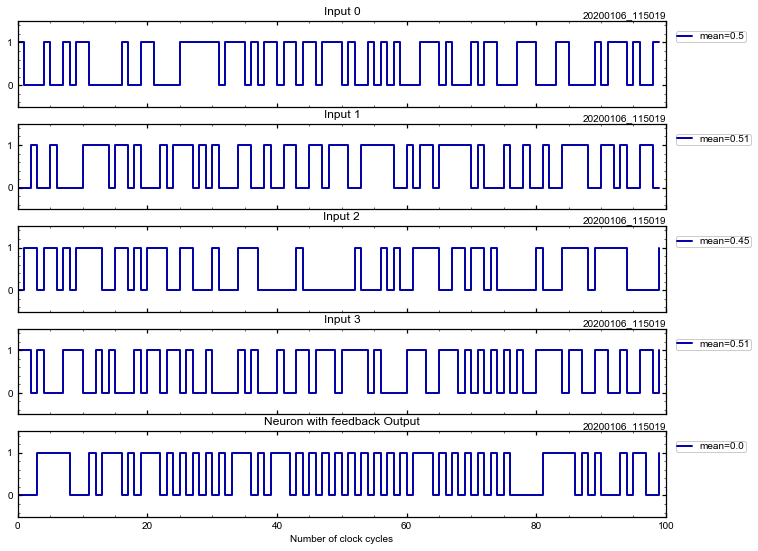

In [4]:
"""
Daniel Maidment

Thu Oct 21 2019
"""
########################################################################
import spyder_utilities as su
import numpy as np
import matplotlib.pyplot as plt
from spnetwork.neuron import DelayFBNeuron2
########################################################################
np.random.seed(100)
tn = neuron.DelayFBNeuron2(N=4, Nfb=2)
N = 100
p = 0.5
nS = 4
t = np.arange(0, N, 1)
s = np.random.binomial(1, p, (N, nS))
tnout = np.zeros(N, dtype=int)
for i in range(N):
    tn+s[i]
    tnout[i] = int(tn.state)

fig0, axarr = plt.subplots(nS+1, 1, figsize=(12, 1.5*(nS+nN)),
                           sharex=True, sharey=True)
for i in range(nS):
    axarr[i] = su.binary_ax_config(N=N, ax=axarr[i])
    axarr[i].step(t, s[:, i], where='post', linewidth=2,
                  label="mean={:.3}".format(np.mean(s[:, i])))
    axarr[i].legend(loc="upper left", bbox_to_anchor=(1,1))
    axarr[i].set_title(f"Input {i}")

axarr[-1] = su.binary_ax_config(N=N, ax=axarr[-1])
axarr[-1].step(t, tnout, where='post', linewidth=2,
               label="mean={:.3}".format(np.mean(tnout[1])))
axarr[-1].legend(loc="upper left", bbox_to_anchor=(1,1))
axarr[-1].set_title("Neuron with feedback Output")
axarr[-1].set_xlabel("Number of clock cycles")
plt.show()

#### Generate Neuron test bench files.

In [3]:
########################################################################
import spyder_utilities as su
import numpy as np
import matplotlib.pyplot as plt
from spnetwork.neuron import DelayFBNeuron2
########################################################################
np.random.seed(100)
tn = DelayFBNeuron2(N=4, Nfb=2)
N = 100
p = 0.4
nS = 4
t = np.arange(0, N, 1)
s = np.random.binomial(1, p, (N, nS))
tnout = np.zeros(N, dtype=int)

input_vector_file = open(f"Vividio\\input_vectors{p}.txt", 'w')
for i in range(N):
    for j in range(nS):
        input_vector_file.write(str(s[i][j]))
    input_vector_file.write('\n')
input_vector_file.close()

In [5]:
input_vector_file = open(f"Vividio\\input_vectors{p}.txt", 'r')
neuron_output_file = open(f"Vividio\\neuron_outputs{p}.txt", 'w')

tn = DelayFBNeuron2(N=4, Nfb=2)
for line in input_vector_file:
    synaptic_input = [int(i) for i in list(line.strip())]
#     print(synaptic_input)
    tn+synaptic_input
    neuron_output_file.write(str(int(tn.state))+'\n')

input_vector_file.close()
neuron_output_file.close()

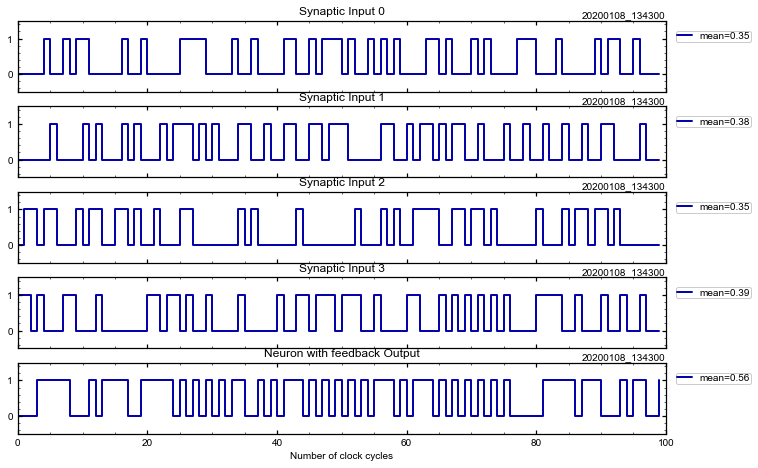

In [7]:
python_neuron = []
# vhdl_neuron = []
synapses = []

input_vector_file = open(f"Vividio\\input_vectors{p}.txt", 'r')
neuron_output_file = open(f"Vividio\\neuron_outputs{p}.txt", 'r')
for line in input_vector_file:
    synaptic_input = [int(i) for i in list(line.strip())]
    neuron_output = int(neuron_output_file.readline().strip())
    synapses.append(synaptic_input)
    python_neuron.append(neuron_output)
#     print(synaptic_input, neuron_output)
    
input_vector_file.close()
neuron_output_file.close()
synapses = np.array(synapses)
python_neuron = np.array(python_neuron)

fig0, axarr = plt.subplots(nS+1, 1, figsize=(12, 1.5*(nS+1)),
                           sharex=True, sharey=True)
for i in range(nS):
    axarr[i] = su.binary_ax_config(N=N, ax=axarr[i])
    axarr[i].step(t, synapses[:, i], where='post', linewidth=2,
                  label="mean={:.3}".format(np.mean(synapses[:, i])))
    axarr[i].legend(loc="upper left", bbox_to_anchor=(1,1))
    axarr[i].set_title(f"Synaptic Input {i}")

axarr[-1] = su.binary_ax_config(N=N, ax=axarr[-1])
axarr[-1].step(t, python_neuron, where='post', linewidth=2,
               label="mean={:.3}".format(np.mean(python_neuron)))
axarr[-1].legend(loc="upper left", bbox_to_anchor=(1,1))
axarr[-1].set_title("Neuron with feedback Output")
axarr[-1].set_xlabel("Number of clock cycles")
plt.show()

In [11]:
########################################################################

import spyder_utilities as su
import numpy as np
import matplotlib.pyplot as plt

########################################################################
N=10000
P = np.arange(0.01, 1.0, 0.01)
signal_file = open("Vividio//neuron_input_multiple_frequencies0.01.txt",
                   'w')
for p in P:
    for i in range(N):
        val = np.random.binomial(1, p)
        signal_file.write(str(val)+'\n')
signal_file.close()

In [17]:
p_x = P
print(len(p_x))

99


In [2]:
########################################################################

import spyder_utilities as su
import numpy as np
import matplotlib.pyplot as plt
from spnetwork.neuron import DelayFBNeuron2

########################################################################
signal_file = open("Vividio//neuron_input_multiple_frequencies0.01.txt",
                   'r')
python_neuron_data = open("Vividio//python_NeuronOutMultFreq0.01.txt",
                          'w')
N = 10000
P = np.arange(0.01, 1.0, 0.01)
python_neuron = DelayFBNeuron2(4, 2)
for i in range(len(P)):
    for j in range(N):
        neuron_input = bool(int(signal_file.readline().strip()))
        python_neuron+neuron_input
        neuron_output = int(python_neuron.state)
        python_neuron_data.write(str(neuron_output)+'\n')
    python_neuron.reset()
        
signal_file.close()
python_neuron_data.close()

### Extract VHDL Neuron frequency information.

In [3]:
########################################################################

import spyder_utilities as su
import numpy as np
import matplotlib.pyplot as plt

########################################################################
vhdl_neuron = []
python_neuron = []
vhdl_file = open("Vividio//vhdl_NeuronOutMultFreq0.01_part_reset.txt",
            'r')
py_file = open("Vividio//python_NeuronOutMultFreq0.01.txt",
                          'r')
for i in range(len(P)*N):
    vhdl_line = vhdl_file.readline().strip()
    py_line = py_file.readline().strip()
    vno = int(vhdl_line)
    pyno = int(py_line)
    vhdl_neuron.append(vno)
    python_neuron.append(pyno)
vhdl_file.close()
py_file.close()
vhdl_neuron = np.array(vhdl_neuron)
python_neuron = np.array(python_neuron)

In [4]:
N=10000
P = np.arange(0.01, 1.0, 0.01)
p_x = P
vhdl_neuron = vhdl_neuron.reshape(len(P), N)
python_neuron = python_neuron.reshape(len(P), N)
p_y_vhdl = np.zeros(len(P))
p_y_py = np.zeros(len(P))
for i in range(len(P)):
    p_y_vhdl[i] = np.mean(vhdl_neuron[i])
    p_y_py[i] = np.mean(python_neuron[i])
p_y_py, p_y_vhdl

(array([0.2878, 0.2839, 0.2901, 0.2826, 0.3018, 0.2948, 0.3194, 0.3136,
        0.3327, 0.3304, 0.3285, 0.3141, 0.3421, 0.3304, 0.3396, 0.3651,
        0.3681, 0.3669, 0.3652, 0.3762, 0.391 , 0.3776, 0.379 , 0.3941,
        0.3904, 0.4038, 0.4067, 0.4051, 0.4238, 0.4131, 0.4297, 0.4427,
        0.4328, 0.4327, 0.4384, 0.4484, 0.4626, 0.4569, 0.4651, 0.4647,
        0.4619, 0.4759, 0.4698, 0.4856, 0.486 , 0.4906, 0.4938, 0.4914,
        0.4934, 0.5016, 0.5051, 0.5064, 0.5091, 0.5117, 0.5149, 0.5023,
        0.5217, 0.519 , 0.5203, 0.5256, 0.5271, 0.5372, 0.5354, 0.5444,
        0.5353, 0.5403, 0.5436, 0.5422, 0.552 , 0.5498, 0.5468, 0.5498,
        0.5558, 0.5531, 0.5601, 0.5575, 0.5555, 0.5588, 0.5598, 0.5563,
        0.5614, 0.5592, 0.5582, 0.5556, 0.553 , 0.5546, 0.5511, 0.5514,
        0.5482, 0.5482, 0.5464, 0.5458, 0.5367, 0.5353, 0.5325, 0.5279,
        0.5199, 0.5116, 0.5041]),
 array([0.2396, 0.2816, 0.2971, 0.3025, 0.3107, 0.2955, 0.3171, 0.3179,
        0.3255, 0.3237, 0.3445

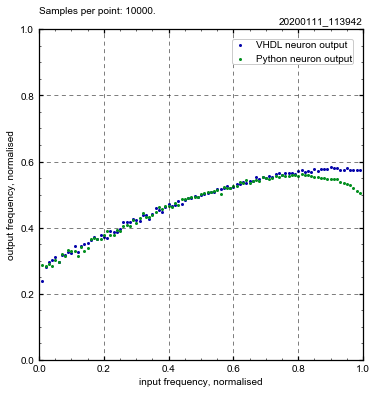

path specified as: \images\neuron


In [6]:
########################################################################

import spyder_utilities as su
import numpy as np
import matplotlib.pyplot as plt

########################################################################
fig2, ax = plt.subplots(1, 1, figsize=(6, 6))
ax = su.config_axis(ax, x_lim=(0, 1), y_lim=(0, 1), Eng=False)

ax.scatter(p_x, p_y_vhdl, label="VHDL neuron output")
ax.scatter(p_x, p_y_py, label="Python neuron output")

s = f"Samples per point: {10000}.\n"
ax.text(0.0, 1.01, s,
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax.transAxes)
ax.set_xlabel("input frequency, normalised")
ax.set_ylabel("output frequency, normalised")
ax.legend()
plt.show()
su.save_fig(fig=fig2, path = "\\images\\neuron",
            image_nm=f"VHDL_Python_Comparison",
            paper_format=['pdf', 'png'], debug=True)

### Generate python model for comparison

## Synapse

### Changing the synaptic seed frequency [$p_{seed}$] and input frequency for a fixed synaptic length [N].

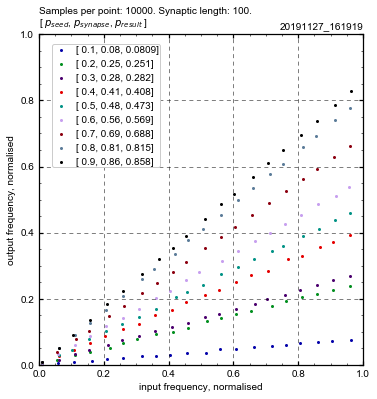

path specified as: \images\synapse


In [7]:
"""
Daniel Maidment

Nov 27 2019
"""
########################################################################

import spyder_utilities as su
import numpy as np
import matplotlib.pyplot as plt
from spnetwork.synapse import Synapse

########################################################################

size = 10000
N = 100

fig2, ax = plt.subplots(1, 1, figsize=(6, 6))
ax = su.config_axis(ax, x_lim=(0, 1), y_lim=(0, 1), Eng=False)
P = np.arange(0.01, 1, 0.05)

for p in np.arange(0.1, 1, 0.1):
    testSynapse = Synapse(N=N, p=p)
    p_x = np.empty(np.shape(P), dtype=float)
    p_y = np.empty(np.shape(P), dtype=float)

    for i in range(len(P)):
        in_ar = np.array(np.random.binomial(1, P[i], size), dtype=bool)
        out_ar = np.zeros(size, bool)

        for j in range(size):
            out_ar[j] = testSynapse*in_ar[j]

        p_x[i] = np.mean(in_ar)
        p_y[i] = np.mean(out_ar)

    slope = np.mean(np.gradient(p_y, p_x))
    label = "[{:4.3}, {:4.3}, {:4.3}]".format(p, testSynapse.getMean(), slope)
    ax.scatter(p_x, p_y, label=label)

s = f"Samples per point: {size}. "
s += f"Synaptic length: {N}.\n"
s += r"[ $p_{seed}$, $p_{synapse}$, $p_{result}$ ]"
plt.legend(bbox_to_anchor=(0.01, 1), loc = "upper left")
ax.text(0, 1.01, s,
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax.transAxes)
ax.set_xlabel("input frequency, normalised")
ax.set_ylabel("output frequency, normalised")
plt.show()
su.save_fig(fig=fig2, path = "\\images\\synapse",
            image_nm=f"Synapse_frequency_model_N{N}",
            paper_format=['pdf', 'png'], debug=True)

### Changing the input frequency and synaptic length [N] for a fixed synaptic frequency [$p_{seed}=0.5$].

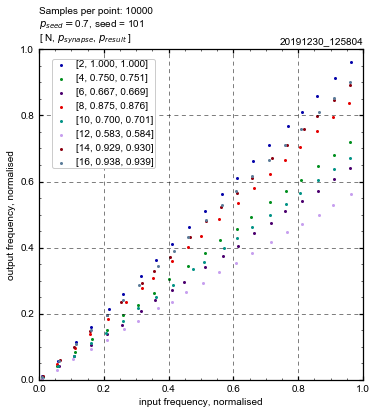

path specified as: \images\synapse


In [5]:
"""
Daniel Maidment

Nov 27 2019
"""
########################################################################

import spyder_utilities as su
import numpy as np
import matplotlib.pyplot as plt
from spnetwork.synapse import Synapse

########################################################################

size = 10000
N = 17
p=[0.3, 0.7]
seed = 101
np.random.seed(seed)

fig2, ax = plt.subplots(1, 1, figsize=(6, 6))
i=1
ax = su.config_axis(ax, x_lim=(0, 1), y_lim=(0, 1), Eng=False)
P = np.arange(0.01, 1, 0.05)
for n in np.arange(2, N, 2):
    testSynapse = Synapse(N=n, p=p[i])
    p_x = np.empty(np.shape(P), dtype=float)
    p_y = np.empty(np.shape(P), dtype=float)

    for k in range(len(P)):
        in_ar = np.array(np.random.binomial(1, P[k], size), dtype=bool)
        out_ar = np.zeros(size, bool)

        for j in range(size):
            out_ar[j] = testSynapse*in_ar[j]

        p_x[k] = np.mean(in_ar)
        p_y[k] = np.mean(out_ar)

    slope = np.mean(np.gradient(p_y, p_x))
    label = "[{}, {:.3f}, {:.3f}]".format(n, testSynapse.getMean(), slope)
    ax.scatter(p_x, p_y, label=label)

s = f"Samples per point: {size}\n"
s += r"$p_{seed}=$"+f"{p[i]}, "
s += f"seed = {seed}\n"
s += r"[ N, $p_{synapse}$, $p_{result}$ ]"
ax.legend(bbox_to_anchor=(0.01, 1), loc = "upper left")
ax.text(0, 1.01, s,
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax.transAxes)
ax.set_xlabel("input frequency, normalised")
ax.set_ylabel("output frequency, normalised")
plt.show()
su.save_fig(fig=fig2, path = "\\images\\synapse",
            image_nm=f"Synapse_frequency_model_pseed{p[i]}_seed{seed}",
            paper_format=['pdf', 'png'], debug=True)

### Generating test bench signals

In [4]:
########################################################################

import spyder_utilities as su
import numpy as np
import matplotlib.pyplot as plt
from spnetwork.synapse import Synapse

########################################################################
N=1000
signal_file = open("Vividio//synapse_input_vector.txt", 'w')
for p in np.arange(0.1, 1.0, 0.1):
    for i in range(N):
        val = np.random.binomial(1, p)
        signal_file.write(str(val)+'\n')
signal_file.close()

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9


### Generate list of synaptic seeds

In [47]:
########################################################################

import spyder_utilities as su
import numpy as np
import matplotlib.pyplot as plt
from spnetwork.synapse import Synapse

########################################################################

seed = 1011
np.random.seed(seed)
N_S = 10
P = np.arange(0.2, 1, 0.2)
file = open("Vividio//synapse//synaptic_seeds.txt", 'w')
for p in P:
    line = np.random.binomial(1, p, N_S)
    for j in line:
        file.write(str(j)+', ')
    file.write('\n')
file.close()

### Extract VHDL synapse frequency information.

In [47]:
# print(np.random.binomial(1, 0.5, 16))
reg_val = np.array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0],
                   dtype=int)
print(np.mean(reg_val))

0.625


In [45]:
vhdl_synapse0 = []
vhdl_synapse1 = []
vhdl_synapse2 = []
vhdl_synapse3 = []
file0 = open("Vividio//synapse//vhdl_synapse_output_0.txt", 'r')
file1 = open("Vividio//synapse//vhdl_synapse_output_1.txt", 'r')
file2 = open("Vividio//synapse//vhdl_synapse_output_2.txt", 'r')
file3 = open("Vividio//synapse//vhdl_synapse_output_3.txt", 'r')
for line0 in file0:
    so = int(line0.strip())
    vhdl_synapse0.append(so)
for line1 in file1:
    so = int(line1.strip())
    vhdl_synapse1.append(so)
for line2 in file2:
    so = int(line2.strip())
    vhdl_synapse2.append(so)
for line3 in file3:
    so = int(line3.strip())
    vhdl_synapse3.append(so)

file0.close()
file1.close()
file2.close()
file3.close()
vhdl_synapse0 = np.array(vhdl_synapse0)
vhdl_synapse1 = np.array(vhdl_synapse1)
vhdl_synapse2 = np.array(vhdl_synapse2)
vhdl_synapse3 = np.array(vhdl_synapse3)

In [46]:
vhdl_synapse0 = vhdl_synapse0.reshape((9, 1000))
vhdl_synapse1 = vhdl_synapse1.reshape((9, 1000))
vhdl_synapse2 = vhdl_synapse2.reshape((9, 1000))
vhdl_synapse3 = vhdl_synapse3.reshape((9, 1000))
p_x = np.arange(0.1, 1, 0.1)
p_y0 = np.zeros(9)
p_y1 = np.zeros(9)
p_y2 = np.zeros(9)
p_y3 = np.zeros(9)
for i in range(9):
    p_y0[i] = np.mean(vhdl_synapse0[i])
    p_y1[i] = np.mean(vhdl_synapse1[i])
    p_y2[i] = np.mean(vhdl_synapse2[i])
    p_y3[i] = np.mean(vhdl_synapse3[i])
p_x, p_y0

(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 array([0.015, 0.032, 0.078, 0.089, 0.095, 0.117, 0.141, 0.166, 0.181]))

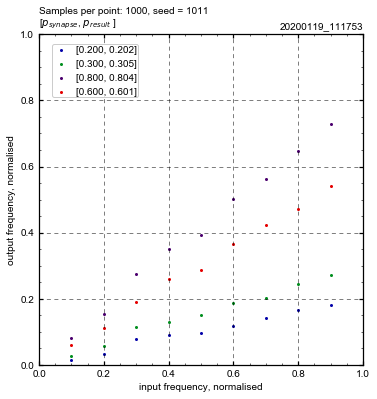

path specified as: \images\synapse


In [52]:
########################################################################

import spyder_utilities as su
import numpy as np
import matplotlib.pyplot as plt
from spnetwork.synapse import Synapse

########################################################################
fig2, ax = plt.subplots(1, 1, figsize=(6, 6))
ax = su.config_axis(ax, x_lim=(0, 1), y_lim=(0, 1), Eng=False)

slope0 = np.mean(np.gradient(p_y0, p_x))
label = "[{:.3f}, {:.3f}]".format(np.mean([0, 0, 0, 0, 1, 0, 0, 0, 1, 0]), slope0)
ax.scatter(p_x, p_y0, label=label)

slope1 = np.mean(np.gradient(p_y1, p_x))
label = "[{:.3f}, {:.3f}]".format(np.mean([0, 0, 0, 1, 0, 1, 0, 0, 1, 0]), slope1)
ax.scatter(p_x, p_y1, label=label)

slope2 = np.mean(np.gradient(p_y2, p_x))
label = "[{:.3f}, {:.3f}]".format(np.mean([1, 0, 0, 1, 1, 1, 1, 1, 1, 1]), slope2)
ax.scatter(p_x, p_y2, label=label)

slope3 = np.mean(np.gradient(p_y3, p_x))
label = "[{:.3f}, {:.3f}]".format(np.mean([1, 1, 1, 0, 1, 1, 0, 0, 0, 1]), slope3)
ax.scatter(p_x, p_y3, label=label)

s = f"Samples per point: {1000}, "
# s += r"$p_{seed}=$"+f"{p[i]}, "
s += f"seed = {seed}\n"
s += r"[$p_{synapse}$, $p_{result}$ ]"
ax.legend(bbox_to_anchor=(0.01, 1), loc = "upper left")
ax.text(0, 1.01, s,
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax.transAxes)
ax.set_xlabel("input frequency, normalised")
ax.set_ylabel("output frequency, normalised")
plt.show()
su.save_fig(fig=fig2, path = "\\images\\synapse",
            image_nm=f"VHDL_Synapse_frequency_model",
            paper_format=['pdf', 'png'], debug=True)